# Проверочные задания по классификации текста

### На входе у Вас будет набор текстовых отзывов о фильмах, размеченных как положительные и отрицательные (позитивные и негативные).

Более подробно об этих данных можно почитать здесь: http://ai.stanford.edu/~amaas/data/sentiment/

## Выполните задания, написанные жирным шрифтом!

**Задание: Выполните импорт библиотек и загрузите данные из файла в датафрейм pandas.** <br>
Данные для этого задания находятся в файле `'../DATA/moviereviews.csv'`.

In [6]:
import pandas as pd
import seaborn as sns

In [7]:
df = pd.read_csv('moviereviews.csv')

In [8]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


**Задание: Проверьте, есть ли какие-либо отсутствующие значения в этих данных.**

In [9]:
df.isnull().sum()

label      0
review    35
dtype: int64

**Задание: Удалите отзывы о фильмах, текст которых принимает значение NaN**

In [10]:
df = df.dropna()
df.isnull().sum()

label     0
review    0
dtype: int64

**Задание: Проверьте, есть ли какие-то отзывы с пустым текстом, но отличающимся от значения NaN. То есть, текст может быть таким: "" или "  " или какая-то другая строка из нескольких пробелов. Как это можно проверить? Это можно сделать разными способами. После того как Вы найдёте такие отзывы, удалите их из датафрейма. [В качестве подсказки можете использовать эту ссылку.](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.isspace.html)**

In [11]:
df = (df[~df['review'].str.isspace()])

In [12]:
df['review'].str.isspace()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Name: review, Length: 1938, dtype: bool

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**Задание: Посчитайте количество строк для различных значений колонки label:**

<Axes: xlabel='label', ylabel='count'>

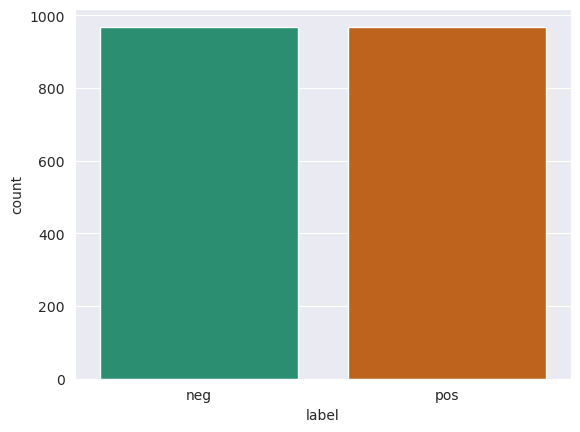

In [14]:
sns.countplot(x='label', data=df, palette='Dark2')

## Исследование данных (EDA) для мешка слов (bag of words)

**Бонусное задание: можете ли Вы с помощью модели CountVectorizer найти 20 наиболее часто встречающихся слов (которые не являются стоп-словами в английском языке), отдельно для каждого значения колонки label? Обратите внимание, что это бонусное задание, и здесь Вам нужно будет сделать нечто такое, что мы не проходили в лекциях. Однако мы надеемся, что с помощью поиска в Google или другом поисковике Вы сможете найти недостающие элементы.  [В качестве подсказки можете использовать эту ссылку.](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

df[df['label'] == 'neg']
cvs = CountVectorizer(stop_words='english')

In [16]:
data = df[df['label'] == 'neg']['review']
matrix = cvs.fit_transform(data)
sorted(zip(cvs.get_feature_names_out(), matrix.sum(axis=0).tolist()[0]), key=lambda x: -x[1])[:20]

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634)]

In [17]:
data = df[df['label'] == 'pos']['review']
matrix = cvs.fit_transform(data)
sorted(zip(cvs.get_feature_names_out(), matrix.sum(axis=0).tolist()[0]), key=lambda x: -x[1])[:20]

[('film', 5002),
 ('movie', 2389),
 ('like', 1721),
 ('just', 1273),
 ('story', 1199),
 ('good', 1193),
 ('time', 1175),
 ('character', 1037),
 ('life', 1032),
 ('characters', 957),
 ('way', 864),
 ('films', 851),
 ('does', 828),
 ('best', 788),
 ('people', 769),
 ('make', 764),
 ('little', 751),
 ('really', 731),
 ('man', 728),
 ('new', 702)]

### Данные и обучение модели

**Задание: Разделите данные на признаки X и целевую переменную y, а также выполните разбиение на обучающий и тестовый наборы данных (train/test split). Вы можете использовать любые значения параметров, но если Вы захотите свериться с блокнотом с решениями, то в нём мы использовали `test_size=0.20, random_state=101`**

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X, y = df['review'], df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Обучение модели

**Задание: Создайте пайплайн, в котором Вы создадите вектора TF-IDF из сырых текстовых даных, а затем обучите модель машинного обучения, которую сами выберете. После создания пайплайна выполните его обучение на обучающем наборе данных.**

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
pipe = Pipeline([('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

In [22]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('svc', LinearSVC())])

**Задание: выведите на экран отчёт "classification report" и матрицу ошибок для результатов работы пайплайна на тестовых данных.**

In [23]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [24]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.81      0.86      0.83       191
         pos       0.85      0.81      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388


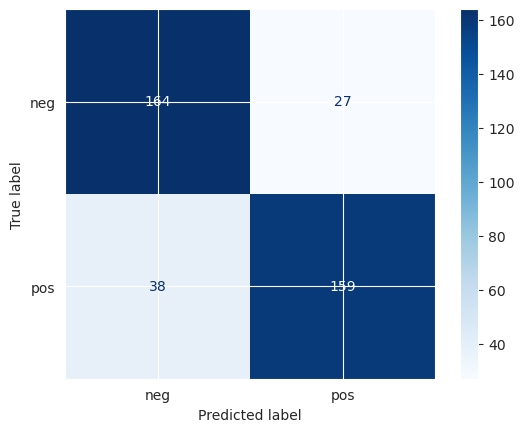

In [25]:
ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap='Blues')